In [10]:
!pip install awswrangler

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
# from pandas import datetime
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [16]:
import awswrangler as wr
path = f"s3://source-voltar/source/file1.csv"
df=wr.s3.read_csv(path)
df.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2015-07-10,17.481333,17.533333,17.188000,17.276667,17.276667,39163500,TSLA
1,2015-07-13,17.483334,17.503332,17.070000,17.477333,17.477333,44404500,TSLA
2,2015-07-14,17.473333,17.732668,17.367332,17.709999,17.709999,28614000,TSLA
3,2015-07-15,17.782667,17.832666,17.472000,17.542667,17.542667,30324000,TSLA
4,2015-07-16,17.614668,17.813334,17.544001,17.778667,17.778667,24240000,TSLA


<Figure size 640x480 with 0 Axes>

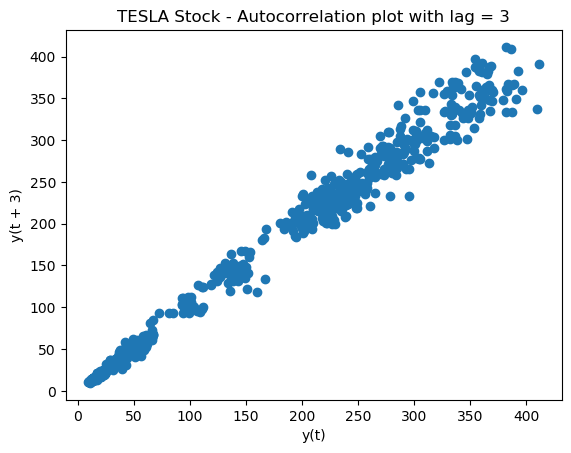

In [18]:
plt.figure()
lag_plot(df['open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

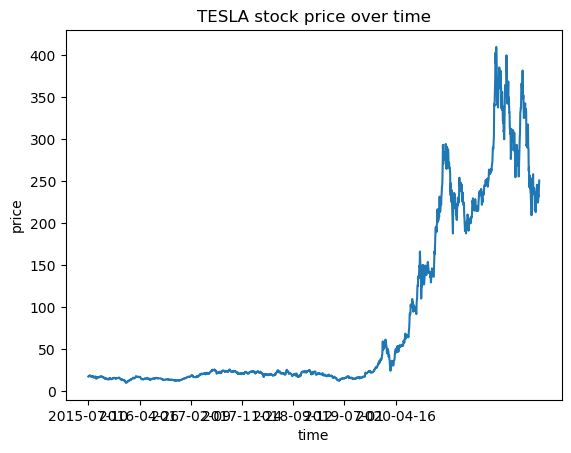

In [19]:
plt.plot(df["date"], df["close"])
plt.xticks(np.arange(0,1259, 200), df['date'][0:1259:200])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [20]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['close'].values
test_data = test_data['close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 99.75410688786198


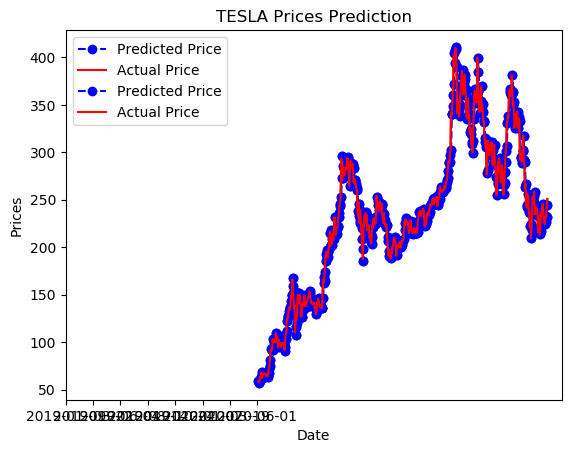

In [22]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.date[881:1259:50])
plt.legend()
plt.show()